In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0,1,1],[0,1,0,1]])
X = X.T

X1 = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])

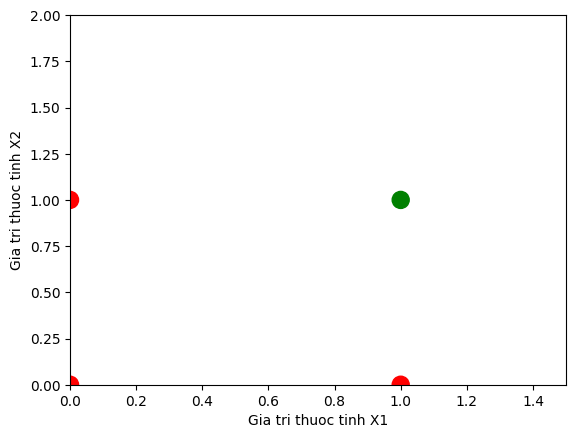

In [3]:
colormap = np.array(['red','green'])
plt.axis([0,1.5,0,2])
plt.scatter(X[:,0],X[:,1], c = colormap[Y],s = 150)
plt.xlabel("Gia tri thuoc tinh X1")
plt.ylabel("Gia tri thuoc tinh X2")
plt.show()

In [4]:
def my_perceptron(X,y,eta,lanlap):
    n = len(X[0,])
    m = len(X[:,0])
    print("m =",m," n =",n)
    w0 = -0.2
    w = (0.5,0.5)
    for t in range(0, lanlap):
        print("lanlap ___",t+1)
        for i in range(0,m):
            gx = w0 + sum(X[i,]*w)
            print("gx = ",gx)
            if(gx >0):
                output = 1
            else:
                output = 0
            w0 = w0 +eta*(y[i]-output)
            w = w + eta*(y[i] - output)*X[i,]
            print(" w0 =",w0)
            print(" w =",w)
    return(np.round(w0,3),np.round(w,3))
my_perceptron(X,Y,0.15,2)
    

m = 4  n = 2
lanlap ___ 1
gx =  -0.2
 w0 = -0.2
 w = [0.5 0.5]
gx =  0.3
 w0 = -0.35
 w = [0.5  0.35]
gx =  0.15000000000000002
 w0 = -0.5
 w = [0.35 0.35]
gx =  0.19999999999999996
 w0 = -0.5
 w = [0.35 0.35]
lanlap ___ 2
gx =  -0.5
 w0 = -0.5
 w = [0.35 0.35]
gx =  -0.15000000000000002
 w0 = -0.5
 w = [0.35 0.35]
gx =  -0.15000000000000002
 w0 = -0.5
 w = [0.35 0.35]
gx =  0.19999999999999996
 w0 = -0.5
 w = [0.35 0.35]


(-0.5, array([0.35, 0.35]))

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data_per.csv to data_per.csv


In [6]:
import pandas as pd


In [7]:
dt = pd.read_csv("data_per.csv")
dt.head()

,X1,X2,X3,X4,X5,Y
0,42000,5850,3,1,2,0
1,38500,4000,2,1,1,0
2,49500,3060,3,1,1,0
3,60500,6650,3,1,2,1
4,61000,6360,2,1,1,1


In [8]:
X = dt.iloc[:,:5]
y = dt.iloc[:,5]


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import Perceptron
net = Perceptron()
net.fit(X_train,y_train)

In [22]:
from sklearn.metrics import accuracy_score
y_pred = net.predict(X_test)
accuracy_score(y_test,y_pred)

0.8

B. Bài tập:
1. Tự viết hàm tương tự hàm my_perceptron() ở câu 1, với thay đổi là dữ
liệu đầu vào có số lượng thuộc tính bất kỳ thay vì 2 thuộc tính. Thử
nghiệm với tập dữ liệu data_per.csv

In [23]:
def my_perceptron(X,y,eta,lanlap):
    X = np.array(X)
    y = np.array(y)
    n = len(X[0,])
    m = len(X[:,0])
    print("m =",m," n =",n)
    w0 = -0.2
    w = np.random.rand(n)
    for t in range(0, lanlap):
        #print("lanlap ___",t+1)
        for i in range(0,m):
            gx = w0 + sum(X[i,]*w)
            #print("gx = ",gx)
            if(gx >0):
                output = 1
            else:
                output = 0
            w0 = w0 +eta*(y[i]-output)
            w = w + eta*(y[i] - output)*X[i,]
            #print(" w0 =",w0)
            #print(" w =",w)
    return(np.round(w0,3),np.round(w,3))
my_perceptron(X,y,0.15,2)

m = 150  n = 4


(7.15, array([61.812, 19.275, 73.347, 28.799]))

2. Sử dụng hàm có sẳn của Sklearn với dữ liệu đầu vào là tập dữ liệu iris, thay
đổi các giá trị tham số max_iter (5,100,1000), eta0 (0.002, 0.02, 0.2). Tính độ
chính xác cho mỗi lần thay đổi tham số ( In giá trị của các tham số và độ chính
xác tương ứng).

In [24]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape,y.shape)

(150, 4) (150,)


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3.0,random_state=0)

In [26]:
max_iter = [5,100,1000]
eta0 = [0.002,0.02,0.2]
for i in range(3):
  net = Perceptron(max_iter = max_iter[i], eta0 = eta0[i])
  net.fit(X_train,y_train)
  y_pred = net.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print("Max_iter = ", max_iter[i], "eta0 = ",eta0, "accuracy = ", accuracy)


Max_iter =  5 eta0 =  [0.002, 0.02, 0.2] accuracy =  0.62
Max_iter =  100 eta0 =  [0.002, 0.02, 0.2] accuracy =  0.62
Max_iter =  1000 eta0 =  [0.002, 0.02, 0.2] accuracy =  0.62


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
